# Predicting Daily Active Energy Burned: Ridge Regression Analysis
### by Micah Borghese

The modern lifestyle often leads to sedentary habits, which can negatively impact one's health. Therefore, understanding and predicting daily energy expenditure becomes crucial for individual health monitoring and management. This project uses personal health data collected from an Apple Watch to predict daily active energy burned (Cal). The objective is to find a reliable way to estimate energy expenditure from daily activities, which can then inform personal health and fitness decisions.

## Data Sourcing

The dataset for this analysis comes from my personal Apple Watch, which records various health metrics throughout the day. Each observation corresponds to one day of data, including the features:

- Distance walking/running (mi)
- Exercise time (min)
- Flights climbed (count)
- Heart rate (count/min)
- Resting heart rate (count/min)
- Stand time (min)
- Step count (count)
- Walking heart rate average (count/min)

The data incorporated in this analysis is dated from April 17th, 2021 to April 17th, 2024. Some specific dates have been omited due to lack of data or incompleteness. For verifiability, the datasets are on my GitHub repository: https://github.com/micahborg/ridge_reg

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

health_data = np.loadtxt('exported_health_data.csv', delimiter=',', skiprows=1, usecols=range(2,11))

y = health_data[:,0] # this is the response Active energy burned(Cal)
X = health_data[:,1:] # the rest of the features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Model Fitting and Prediction

The dataset was split into a training set and a test set, with 95% of the data used for training and 5% for testing. The porportions were selected because I'm also implementing cross-validation on the training data. The features were standardized to have a mean of zero and a standard deviation of one. This ensures that each feature contributes equally to the model's predictions.

In [29]:
print(np.mean(X_train_scaled, axis=0)) # mean: should be near zero
print(np.std(X_train_scaled, axis=0)) # standard deviation: should be one

[-9.30041686e-16 -6.58776915e-17  2.33247157e-17  1.03836089e-14
 -1.25067293e-16  8.81991936e-17 -7.29740342e-16 -5.01216650e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


A RidgeCV model with built-in cross-validation was employed to find the optimal regularization parameter. Ridge Regression was chosen because health data tends to have similar and/or correlating features, so using a regularization term increases the reliability of the estimates. The model is then used to predict the active energy burned for the test data and a separate dataset containing the most recent week's data.

In [30]:
alpha_all = np.logspace(-6, 6, 13)
# Fit the Ridge regression model with cross-validation
ridge_model = RidgeCV(alphas=alpha_all, fit_intercept=True, store_cv_values=True)

ridge_model.fit(X_train_scaled, y_train)

# view model statistics
print('Coefficients:', ridge_model.coef_)
print('Alpha:', ridge_model.alpha_)
print('Score:', ridge_model.score(X_train_scaled,y_train))

Coefficients: [ 220.05395868   53.65573089    0.76377334    0.65909626  -15.1332144
   56.41380144 -183.78329805    6.22839589]
Alpha: 0.1
Score: 0.8159857499415084


In [31]:
# predict and evaluate the model
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 4463.555461757271


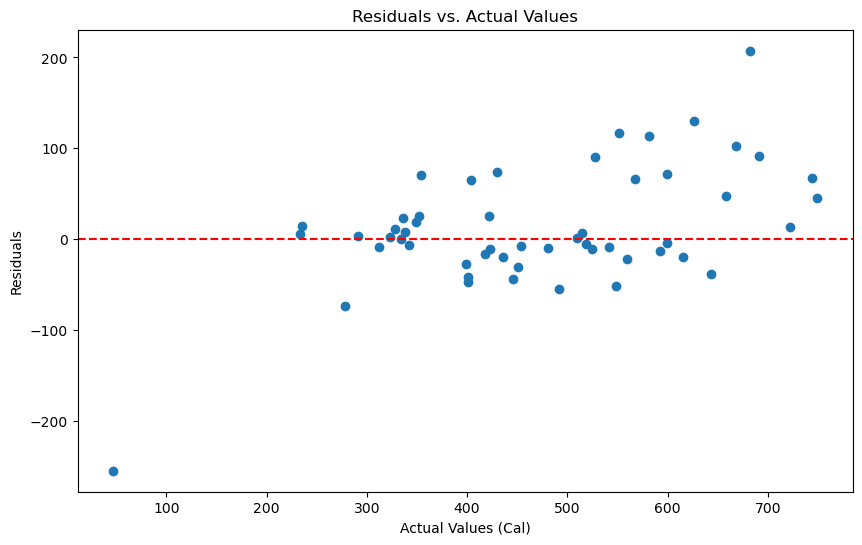

In [32]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values (Cal)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Interpretation of Prediction Results

A few outliers suggest some cases where the model's predictions were off and the differences are quite large (-200 and 200, respectivly). Still, the residual analysis showed that the model predicts the energy expenditure close to accurately for most observations, with many data points less than a 100 calories off.

Predicted values: [418.31236347 452.88345142 514.42189131 285.55791317 444.97801909
 326.6078668  393.92108702 380.24784695]


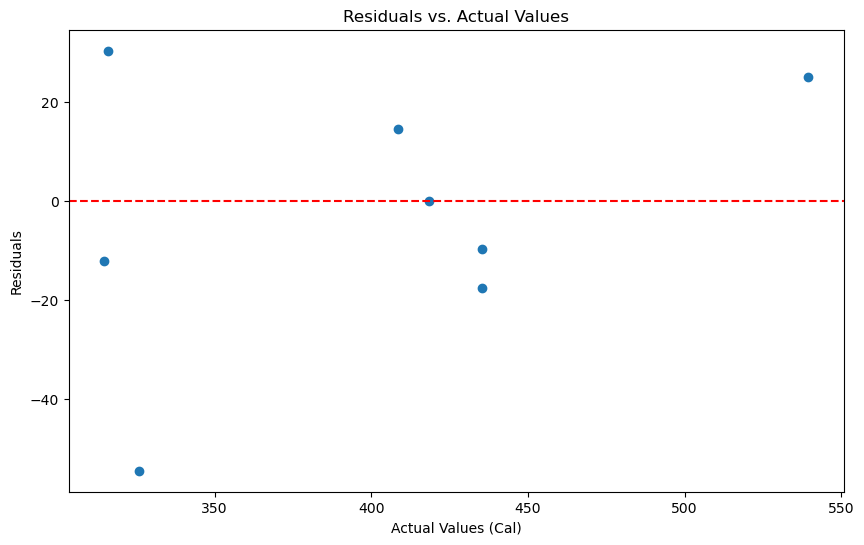

In [33]:
new_week_data = np.loadtxt('this_week_data.csv', delimiter=',', skiprows=1, usecols=range(2,11))

y_new = new_week_data[:,0] # this is the response Active energy burned(Cal)
X_new = new_week_data[:,1:] # the rest of the features

X_new_scaled = scaler.transform(X_new)

y_new_pred = ridge_model.predict(X_new_scaled)

print('Predicted values:', y_new_pred)

residuals = y_new - y_new_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_new, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values (Cal)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Conclusion

The residuals for the current week's heath data is suprisingly lower than the original test data. For the future, different features could be selected to find futher prediction measurements. The model has demonstrated the capacity to "reasonably" predict daily active energy expenditure based on the selected health metrics. The majority of the model's predictions ballpark match the actual data points and predict active calories burned for the day according to my Apple Watch.